#**Entropy (expected information)**
So far any of the methods we have used for data discretization have predominantly focused the variable/attribute it iself and not on the information it contributes to the outcome variable. In order to advance what we have learnt before we need to do the following:

* When discretising a data series we need to consider the information we get from the new categories

* How can we get the right splits in a series that will give us the most information.


Entropy refers to disorder or impurity and decision tree classifier use this measurement of information to determine if a split at a certain point improves the information gain obtained at that split or not. In effect, what we are trying to do  is to make splits that will be most benifical when categorising an attribute from a continous variable. The formula for Entropy can be shown below:

>>Entropy: $Ent(D_1) = \sum_{i=1}^m p1_i.log_2(p1_i)$

where $p_i$ is the probability of having outcome event i,  and $D_1$ is the first category of the proposed atribute $D$.
If we do this for another category for $D_2$ we can calculate the Entropy for $D_2$ similar to that above:

>>  $Ent(D_2) = \sum_{i=1}^m p2_i.log_2(p2_i)$

So if we were proposing to split an attribute $D$ in two, and using this to help us predict a two class variable we would determine the information that a proposed split would give with the following equation:

>> $info_A(D) =  \frac{\lvert D_1 \rvert}{\lvert D \rvert}Entropy(D_1) +\frac{\lvert D_2 \rvert}{\lvert D \rvert}Entropy(D_2)$

where D is the total number of items and $D_1$ and $D_2$ are the number of items in each class for the atribute split in $D$. The challenge we face is to pick the split that gives the most information gain from our first split.

The following [link](https://natmeurer.com/a-simple-guide-to-entropy-based-discretization/) from Natalie Meurer is a lovely description of how the information gain from a split is calcaulated. Natalie has also provided some really nice examples that should make it much clearer.






#**Splitting an Attribute in Practice**

One way to to split an attribute in practice is to model the outcome with the attribute in question, using a decision tree algorithm. The example we saw in the above link can be run through the *python sklearn* decision tree library, using the [C4.5 algorithm](https://scikit-learn.org/stable/modules/tree.html#classification). The [C4.5 algorithm is a child of the ID3](http://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-gain/) algorithm and they use information gain and entropy to optimize their cost functions.
We will take the example from Natalie Meurer's webpage and use the C4.5 decision tree to determine the optimum split. The example can be seen below.

![](https://www.computing.dcu.ie/~amccarren/mcm_images/Entropy_image.png)


The code to do this is really simple. We first specify the input variable (X), then the output variable (Y) and then implement the decision tree classifier. We then use the $tree.plot_tree$ to present the tree. The tree shows where the optimum splits based on information gain. You should be able to see first split is at 10. This is equivalent to that found by Natalie Meurer. It then goes further until all tree nodes have a gini index of zero where you have complete infomation. A gini index of 0 means all the elements of the branch in question belong to a certain class. When all the leafs have a gini index of 0 your tree cannot grow anymore.  

[Text(0.6, 0.875, 'x[0] <= 9.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.625, 'x[0] <= 4.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.375, 'x[0] <= 7.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.75, '  False')]

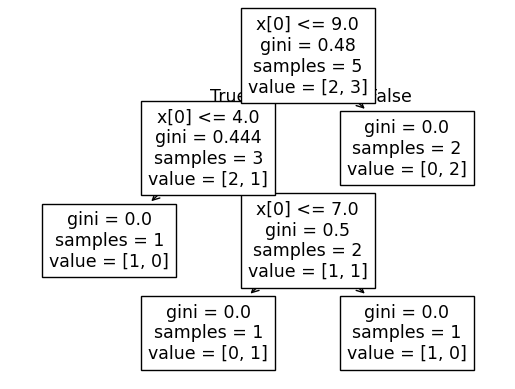

In [1]:
from sklearn import tree
X = [[2],[6],[8],[10],[11]]
#X = [[100],[50],[30],[45],[75]]
#[ 100k, 50k, 30k, 45k, 75k]
Y = [0, 1,0,1,1]
#Y = [1, 0,1,0,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
tree.plot_tree(clf.fit(X, Y))

On the scikit-learn [link](https://scikit-learn.org/stable/modules/tree.html#classification) you should be able to run this analysis on the IRIS data. Experiment with it and share your thoughts on the comments board.